In [1]:
!python -V

Python 3.10.6


In [2]:
import pandas as pd
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

from sklearn.metrics import mean_squared_error

### Q1. Downloading the data

In [3]:
df = pd.read_parquet('data/yellow_tripdata_2022-01.parquet')
df.shape

(2463931, 19)

In [4]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2022-01-01 00:35:40,2022-01-01 00:53:29,2.0,3.80,1.0,N,142,236,1,14.5,3.0,0.5,3.65,0.0,0.3,21.95,2.5,0.0
1,1,2022-01-01 00:33:43,2022-01-01 00:42:07,1.0,2.10,1.0,N,236,42,1,8.0,0.5,0.5,4.00,0.0,0.3,13.30,0.0,0.0
2,2,2022-01-01 00:53:21,2022-01-01 01:02:19,1.0,0.97,1.0,N,166,166,1,7.5,0.5,0.5,1.76,0.0,0.3,10.56,0.0,0.0
3,2,2022-01-01 00:25:21,2022-01-01 00:35:23,1.0,1.09,1.0,N,114,68,2,8.0,0.5,0.5,0.00,0.0,0.3,11.80,2.5,0.0
4,2,2022-01-01 00:36:48,2022-01-01 01:14:20,1.0,4.30,1.0,N,68,163,1,23.5,0.5,0.5,3.00,0.0,0.3,30.30,2.5,0.0


In [5]:
f'There are {df.shape[1]} columns in the dataset for the month of January 2022'

'There are 19 columns in the dataset for the month of January 2022'

### Q2. Computing duration

In [9]:
df['duration'] = df.tpep_dropoff_datetime - df.tpep_pickup_datetime
df.duration = df.duration.apply(lambda td: td.total_seconds() / 60)

In [10]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,duration
0,1,2022-01-01 00:35:40,2022-01-01 00:53:29,2.0,3.80,1.0,N,142,236,1,14.5,3.0,0.5,3.65,0.0,0.3,21.95,2.5,0.0,17.816667
1,1,2022-01-01 00:33:43,2022-01-01 00:42:07,1.0,2.10,1.0,N,236,42,1,8.0,0.5,0.5,4.00,0.0,0.3,13.30,0.0,0.0,8.400000
2,2,2022-01-01 00:53:21,2022-01-01 01:02:19,1.0,0.97,1.0,N,166,166,1,7.5,0.5,0.5,1.76,0.0,0.3,10.56,0.0,0.0,8.966667
3,2,2022-01-01 00:25:21,2022-01-01 00:35:23,1.0,1.09,1.0,N,114,68,2,8.0,0.5,0.5,0.00,0.0,0.3,11.80,2.5,0.0,10.033333
4,2,2022-01-01 00:36:48,2022-01-01 01:14:20,1.0,4.30,1.0,N,68,163,1,23.5,0.5,0.5,3.00,0.0,0.3,30.30,2.5,0.0,37.533333


In [11]:
df.shape

(2463931, 20)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2463931 entries, 0 to 2463930
Data columns (total 20 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[ns]
 2   tpep_dropoff_datetime  datetime64[ns]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee           

In [13]:
df.duration.std()

46.44530513776802

In [14]:
f'The standard deviation of the duration is {df.duration.std()} minutes'

'The standard deviation of the duration is 46.44530513776802 minutes'

### Q3. Dropping outliers

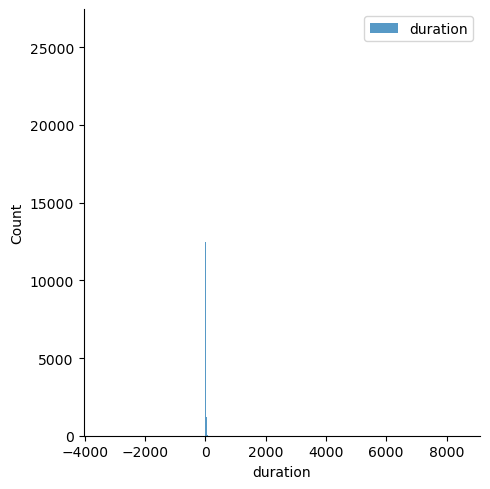

In [15]:
# Checking the distribution of the duration
sns.displot(df['duration'], label='duration')
plt.legend()

In [16]:
df = df[(df.duration >= 1) & (df.duration <= 60)]

In [17]:
df.shape

(2421440, 20)

In [21]:
remaining_data = df.shape[0]/2463931 * 100

In [23]:
f'Fraction of the records left after dropping the outliers is {remaining_data}%'

'Fraction of the records left after dropping the outliers is 98.27547930522405%'

### Q4. One-hot encoding

In [27]:
df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'airport_fee', 'duration'],
      dtype='object')

In [29]:
categorical = ['PULocationID', 'DOLocationID']
#numerical = ['trip_distance'] We are not going to use numerical features in our model

df[categorical] = df[categorical].astype(str)

/tmp/ipykernel_53079/977824396.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[categorical] = df[categorical].astype(str)


In [30]:
df[categorical].dtypes

PULocationID    object
DOLocationID    object
dtype: object

In [31]:
df['PULocationID'] = df['PULocationID'].replace('nan', -1)
df['DOLocationID'] = df['DOLocationID'].replace('nan', -1)

/tmp/ipykernel_53079/3494546681.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PULocationID'] = df['PULocationID'].replace('nan', -1)
/tmp/ipykernel_53079/3494546681.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DOLocationID'] = df['DOLocationID'].replace('nan', -1)


### fractions of missing values for the pickup location ID

In [32]:
fr = df[df['PULocationID'] == -1].shape[0] / df.shape[0]
fr

0.0

### Turn the dataframe into a list of dictionaries for the 2 features we are going to use in our model

In [33]:
train_dicts = df[categorical].to_dict(orient='records')

In [36]:
len(train_dicts), len(train_dicts[0])

(2421440, 2)

In [37]:
train_dicts

[{'PULocationID': '142', 'DOLocationID': '236'},
 {'PULocationID': '236', 'DOLocationID': '42'},
 {'PULocationID': '166', 'DOLocationID': '166'},
 {'PULocationID': '114', 'DOLocationID': '68'},
 {'PULocationID': '68', 'DOLocationID': '163'},
 {'PULocationID': '138', 'DOLocationID': '161'},
 {'PULocationID': '233', 'DOLocationID': '87'},
 {'PULocationID': '238', 'DOLocationID': '152'},
 {'PULocationID': '166', 'DOLocationID': '236'},
 {'PULocationID': '236', 'DOLocationID': '141'},
 {'PULocationID': '141', 'DOLocationID': '229'},
 {'PULocationID': '114', 'DOLocationID': '90'},
 {'PULocationID': '234', 'DOLocationID': '113'},
 {'PULocationID': '246', 'DOLocationID': '79'},
 {'PULocationID': '43', 'DOLocationID': '140'},
 {'PULocationID': '239', 'DOLocationID': '151'},
 {'PULocationID': '148', 'DOLocationID': '141'},
 {'PULocationID': '237', 'DOLocationID': '107'},
 {'PULocationID': '7', 'DOLocationID': '7'},
 {'PULocationID': '107', 'DOLocationID': '263'},
 {'PULocationID': '263', 'DOLoc

### Fitting a dictionary vectorizer and getting a feature matrix from it

In [38]:
dv = DictVectorizer()
X_train = dv.fit_transform(train_dicts)

In [39]:
# dimensionality of this matrix
X_train

<2421440x515 sparse matrix of type '<class 'numpy.float64'>'
	with 4842880 stored elements in Compressed Sparse Row format>

### Training a linear model

In [40]:
target = 'duration'
y_train = df[target].values

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_train)

mean_squared_error(y_train, y_pred, squared=False)

6.986190683927558

### Reading Train and validation datasets

In [44]:
def read_dataframe(filename):
    if filename.endswith('.csv'):
        df = pd.read_csv(filename)

        df.tpep_dropOff_datetime = pd.to_datetime(df.tpep_dropOff_datetime)
        df.tpep_pickup_datetime = pd.to_datetime(df.tpep_pickup_datetime)
    elif filename.endswith('.parquet'):
        df = pd.read_parquet(filename)

    df['duration'] = df.tpep_dropoff_datetime - df.tpep_pickup_datetime
    df.duration = df.duration.apply(lambda td: td.total_seconds() / 60)

    df = df[(df.duration >= 1) & (df.duration <= 60)]

    categorical = ['PULocationID', 'DOLocationID']
    df[categorical] = df[categorical].astype(str)
    
    return df

In [45]:
df_val = read_dataframe('./data/yellow_tripdata_2022-02.parquet')

### Creating validation dictionaries and transforming the validation dataset

In [46]:
val_dicts = df_val[categorical].to_dict(orient='records')
X_val = dv.transform(val_dicts)

### Extracting predicting array for the validation set

In [47]:
target = 'duration'
y_val = df_val[target].values

### Fitting and scoring the model for the validation dataset

In [48]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_val)

mean_squared_error(y_val, y_pred, squared=False)

7.786409961345227